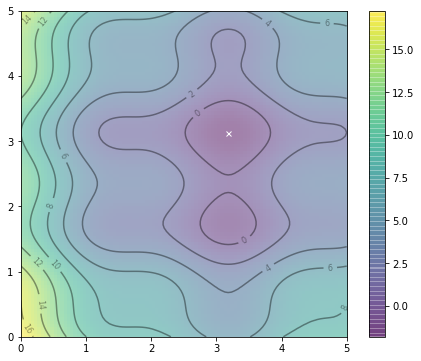

In [42]:
import numpy as np
import matplotlib.pyplot as plt
 
def f(x,y):
    "Objective function"
    return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)
 
# Contour plot: With the global minimum showed as "X" on the plot
x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
z = f(x, y)
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]
plt.figure(figsize=(8,6))
plt.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
plt.colorbar()
plt.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = plt.contour(x, y, z, 10, colors='black', alpha=0.4)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
plt.show()

In [52]:
n_particles = 50
X = np.random.rand(2, n_particles) * 5
V = np.random.randn(2, n_particles) * 0.1

(0.0, 5.0)

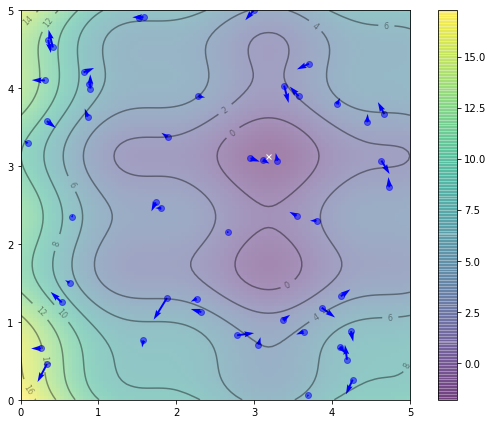

In [53]:
# setting the plot parameters
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")

# plotting the contour of the function
contours   = ax.contour(x, y, z, 10, colors='black', alpha=0.4)  
# plotting the population
p_plot     = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
# plotting the velocity of each point
p_arrow    = ax.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)

ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
ax.set_xlim([0,5])
ax.set_ylim([0,5])

In [54]:
# initialising the optimisation Parameters 
pbest     = X                              #>>> setting the best value of each X
pbest_obj = f(X[0], X[1])                  #>>> setting the best value of each f(X)
gbest     = pbest[:, pbest_obj.argmin()]   #>>> setting the global best value of Xg
gbest_obj = pbest_obj.min()                #>>> setting the global best value of f(Xg)

In [55]:
c1 = c2 = 0.1
w  = 0.8

stepCounter = 0                  # Number of steps
while (stepCounter < 20) :
    r         = np.random.rand(2)
    V         = w * V + c1*r[0]*(pbest - X) + c2*r[1]*(gbest.reshape(-1,1)-X)
    X         = X + V
    obj       = f(X[0], X[1])
    pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).max(axis=0)
    gbest     = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()
    stepCounter += 1
    

(0.0, 5.0)

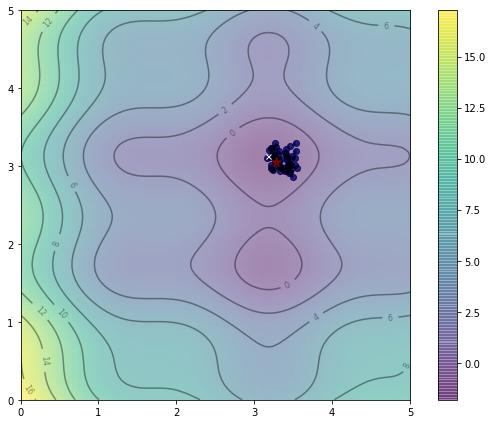

In [56]:
# setting the plot parameters
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")

# plotting the contour of the function
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)

# plotting the population and their velocities
p_plot  = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)

# plotting the global best
pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=100, color='red', alpha=0.4)

ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
ax.set_xlim([0,5])
ax.set_ylim([0,5])